In [190]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#Leer las imágenes

imgOriginal = Image.open("../morgana.jpg")
# imgOriginal = Image.open("gatitoP.jpg")


imgOriginal = np.array(imgOriginal, dtype=int)

print(imgOriginal.shape)
R = imgOriginal[:,:,0]
G = imgOriginal[:,:,1]
B = imgOriginal[:,:,2]

(512, 512, 3)


In [191]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        
       
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd,
                            X_even+factor[int(N/2):]*X_odd])
        return X
    
def IFFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey IFFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = IFFT(x[::2])
        X_odd = IFFT(x[1::2])
        factor = np.exp(2j*np.pi*np.arange(N)/ N)
        
        # Redimensionar X_even y X_odd según la forma de los factores
        X_even = np.resize(X_even, factor[:int(N/2)].shape)
        X_odd = np.resize(X_odd, factor[int(N/2):].shape)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd,
                            X_even+factor[int(N/2):]*X_odd])
        return X

In [192]:
def FFT2D(matrix):
    """
    Perform the 2D FFT on a matrix 
    by applying the 1D FFT on the 
    rows and then on the columns.
    """
    row = np.zeros(matrix.shape, dtype=complex)
    for i in range(matrix.shape[0]):
        row[i,:] = FFT(matrix[i,:])
        
    col = np.zeros(matrix.shape, dtype=complex)
    for i in range(matrix.shape[1]):
        col[:,i] = FFT(row[:,i])
        
    return col

def IFFT2F(matrix):
    """
    Perform the 2D Inverse FFT on a matrix 
    by applying the 1D IFFT on the 
    rows and then on the columns.
    """
    row = np.zeros(matrix.shape, dtype=complex)
    for i in range(matrix.shape[0]):
        row[i,:] = IFFT(matrix[i,:])
        
    col = np.zeros(matrix.shape, dtype=complex)
    for i in range(matrix.shape[1]):
        col[:,i] = IFFT(row[:,i])
        
    return col

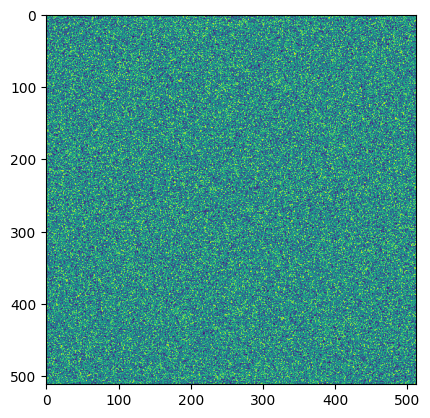

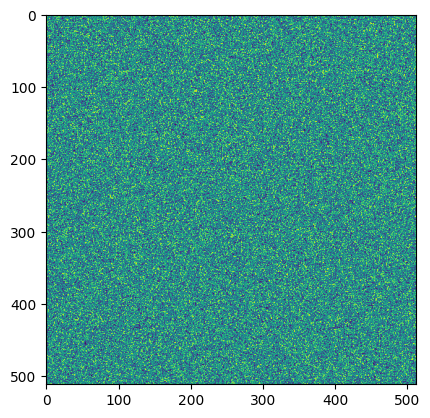

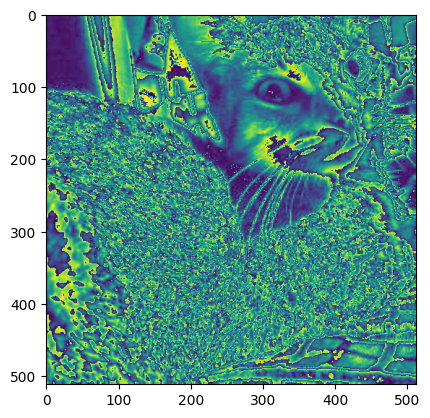

In [193]:
prueba = FFT2D(R)



plt.imshow(Image.fromarray(np.uint8(prueba.real)))
plt.show()

plt.imshow(Image.fromarray(np.uint8(prueba.imag)))
plt.show()


imgprueba = IFFT2F(prueba)

plt.imshow(Image.fromarray(np.uint8(np.mod(imgprueba.real,255))))

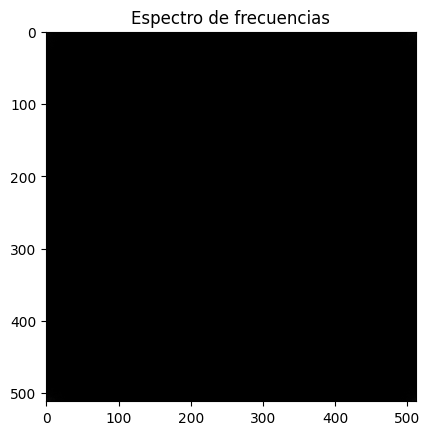

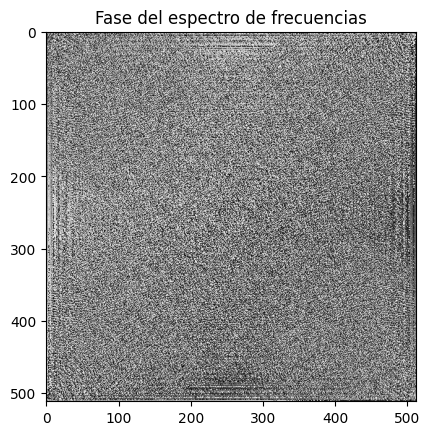

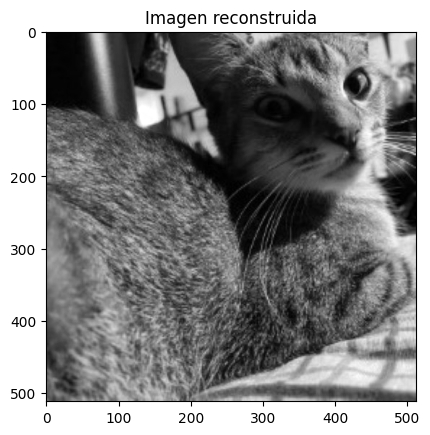

In [194]:
# Obtener el espectro de frecuencias de la imagen
espectro = FFT2D(R)

# Mostrar la parte real del espectro de frecuencias
plt.imshow(np.abs(espectro), cmap='gray')
plt.title('Espectro de frecuencias')
plt.show()

# Mostrar la parte imaginaria del espectro de frecuencias
plt.imshow(np.angle(espectro), cmap='gray')
plt.title('Fase del espectro de frecuencias')
plt.show()

# Obtener la imagen reconstruida a partir del espectro de frecuencias
imagen_reconstruida = IFFT2F(espectro)

# Mostrar la imagen reconstruida
plt.imshow(np.abs(imagen_reconstruida), cmap='gray')
plt.title('Imagen reconstruida')
plt.show()
